In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('/Data/Train.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
df.shape

(8523, 12)

In [11]:
df.describe()
#Item_Weight has (8523-7060) 1463 missing values
#Otherwise Item_visibility, Item_MRP,Outlet_Establishment_Year, Item_Outlet_Sales have expected values 8523

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
#Non-numeric values Item_Identifier,Item_Fat_Content, Item_Type,Outlet_Identifier,
#Outlet_Size,Outlet_Location_Type,Outlet_Type
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
df['Outlet_Size'].value_counts()
# Outlet_Size has 2410 missing values

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [27]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [29]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

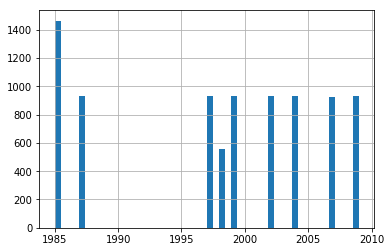

In [25]:
%matplotlib inline
df['Outlet_Establishment_Year'].hist(bins=50)

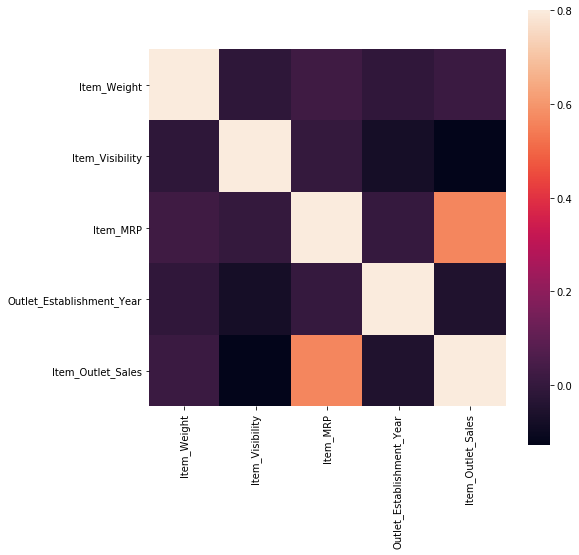

In [33]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_matrix, vmax=.8, square=True)

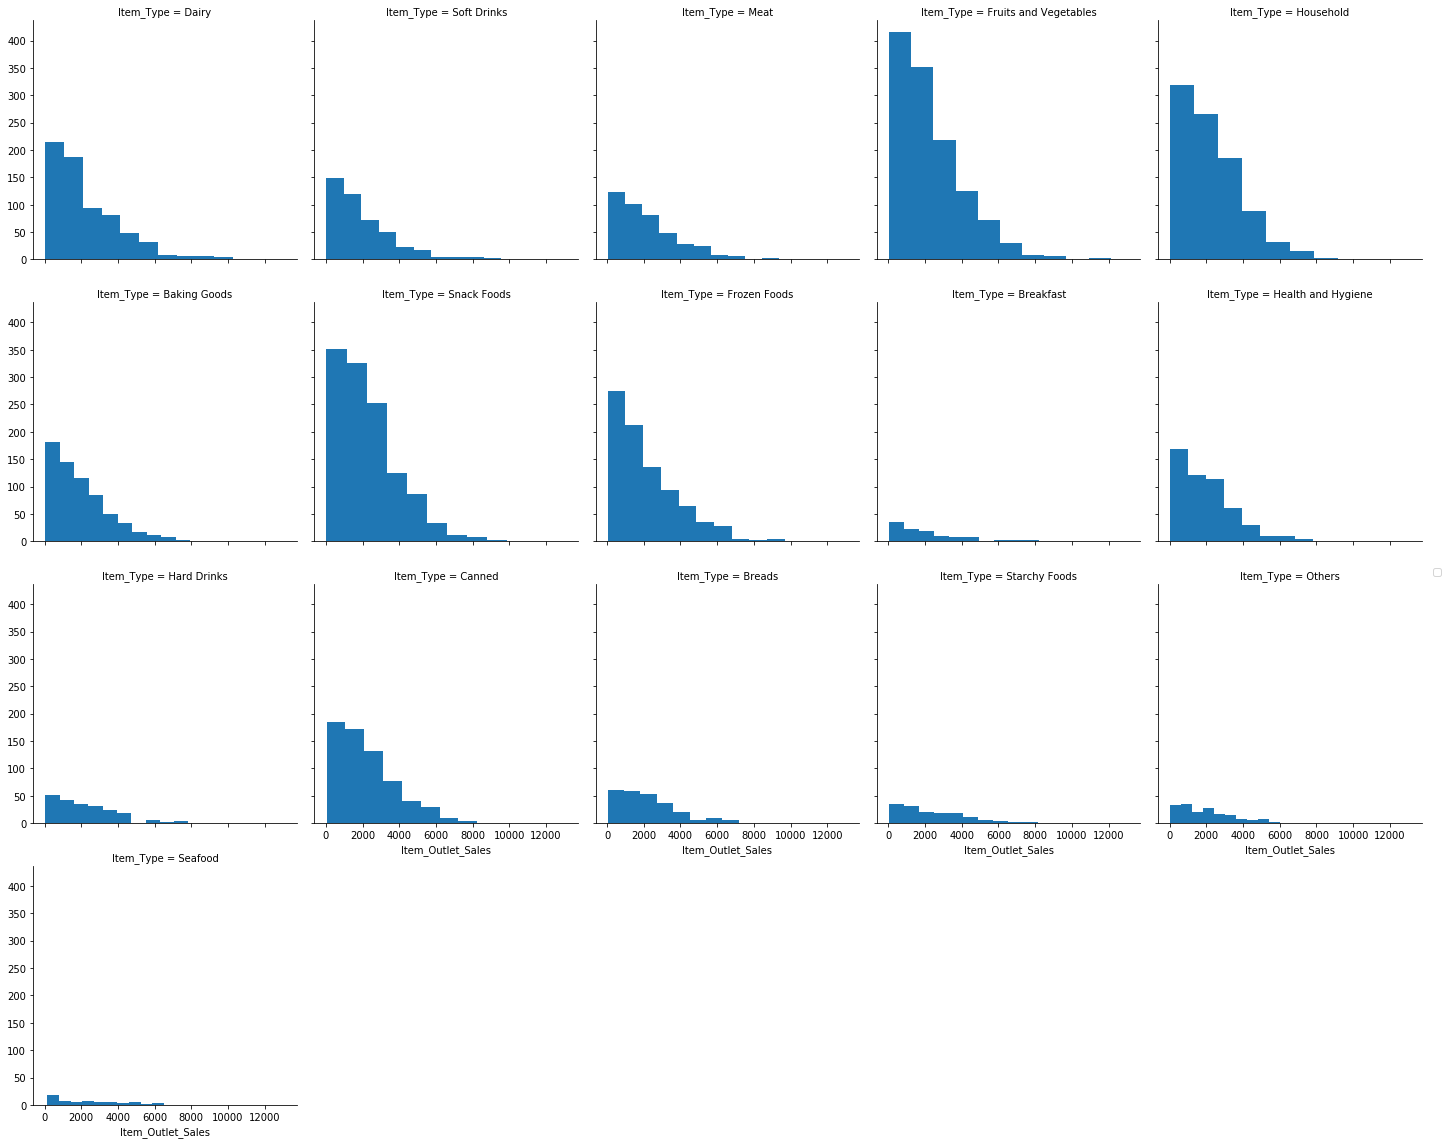

In [46]:
sns.FacetGrid(df, col='Item_Type', size=4, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();

Fruits and Vegetables, Household, Snacks food, Frozen Food has higher sell

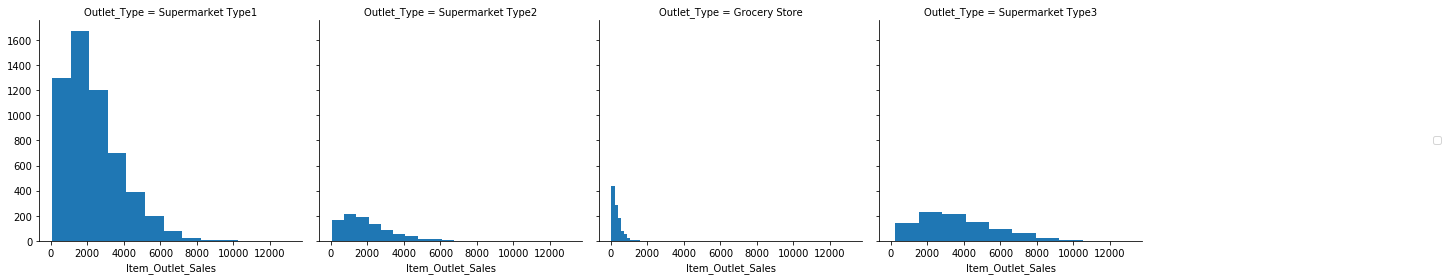

In [42]:
sns.FacetGrid(df, col='Outlet_Type', size=4, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();
    
    #Supermarket Type 1 has highest sales

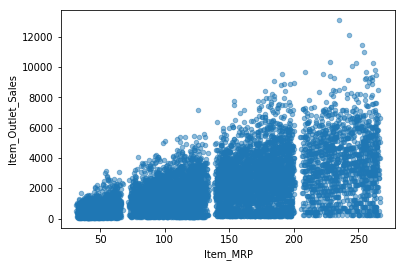

In [53]:
df.plot(kind='scatter', x = 'Item_MRP', y = 'Item_Outlet_Sales', alpha=.5);

# Missing Values

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

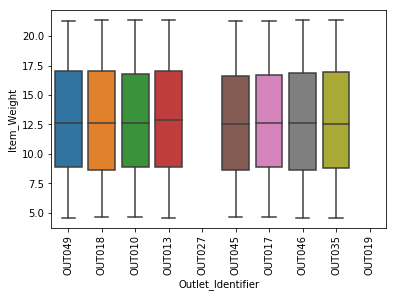

In [49]:
sns.boxplot(df['Outlet_Identifier'],df['Item_Weight'])
plt.xticks(rotation='90')

In [35]:
df['Item_Fat_Content'].unique()
#Low Fat=low fat= LF .Similarly,Regular=reg

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [36]:
# Lets replace the values of Item_Fat_Content
df['Item_Fat_Content']=df['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace(['reg'],'Regular')
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

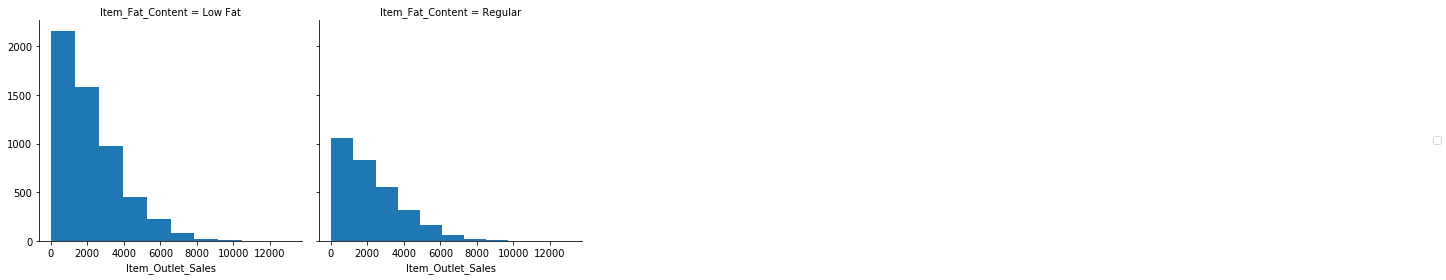

In [51]:
sns.FacetGrid(df, col='Item_Fat_Content', size=4, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();

In [37]:
#Missing values
df.isnull().sum()
#Item_Weight and Outlet_Size has missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

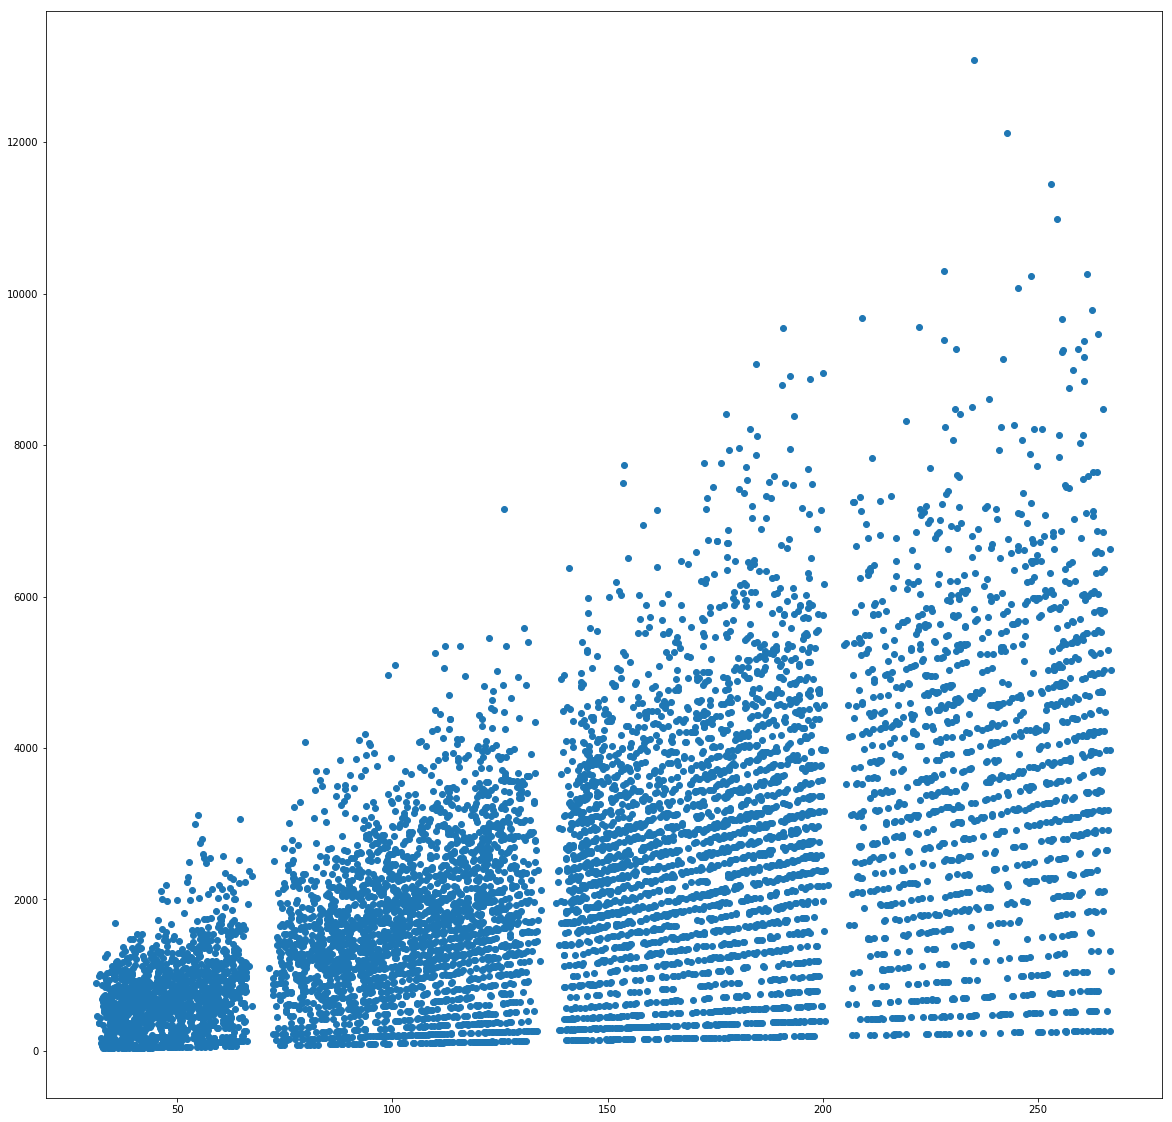

In [56]:
plt.figure(figsize=(20,20))
plt.scatter(x=df["Item_MRP"],y=df["Item_Outlet_Sales"])
#Use for feature Engineering to find the price per item

In [57]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object